In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [34]:
hd = pd.read_csv('D:/UPC/ML/HDD Project/ML LAB/processed.cleveland.csv')
print(hd.shape)
X = hd.iloc[:, :-1].values
y = hd.iloc[:, -1].values
print(hd.head())
hd.shape

(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  target  
0  0    6       0  
1  3    3       2  
2  2    7       1  
3  0    3       0  
4  0    3       0  


(303, 14)

In [46]:
dataTypeSeries = hd.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)
hd.describe()

Data type of each column of Dataframe :
age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
target        int64
dtype: object


,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,2.396040,94.422442,176.825083,0.366337,0.940594,112.488449,0.435644,0.777228,1.336634,0.458746
std,1.193907,59.672004,117.225680,0.482600,0.847534,71.391322,0.496661,0.741157,0.544884,0.499120
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,120.000000,218.000000,0.000000,1.000000,148.000000,0.000000,1.000000,1.000000,0.000000
75%,3.000000,135.500000,256.500000,1.000000,2.000000,164.000000,1.000000,1.000000,2.000000,1.000000
max,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,1.000000


# Taking Care of missing data

In [17]:
hd.isnull()
hd1=hd.dropna()
hd1.shape

(303, 14)

# Finding Outliers

KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"

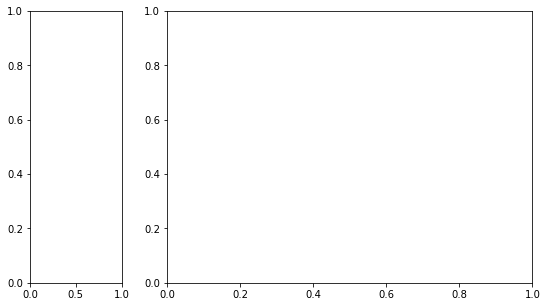

In [76]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
hd.boxplot(column='age',ax=axes[0]);
hd.hist(column='age', ax=axes[1]);

TODO: box plot each attribute using seaborn/matplotlib and see if any outliers 

Text(0.5, 1.0, 'Boxplot')

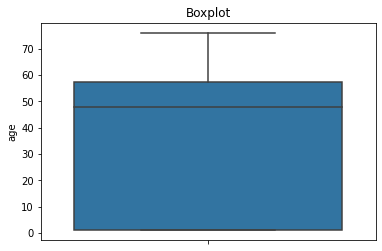

In [80]:
sns.boxplot(y=hd['age'])
plt.title('Boxplot')

# Visualization


In [35]:
hd['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [14]:
hd['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [37]:
hd.loc[hd.target == 2] = 1
hd.loc[hd.target == 3] = 1
hd.loc[hd.target == 4] = 1

0    164
1    139
Name: target, dtype: int64


<AxesSubplot:>

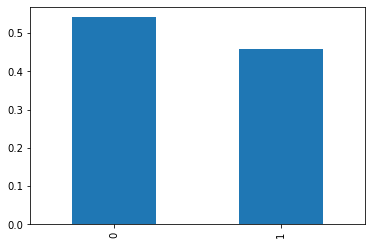

In [39]:
print(hd['target'].value_counts())

hd.target.value_counts(normalize=True).plot(kind='bar')


<AxesSubplot:>

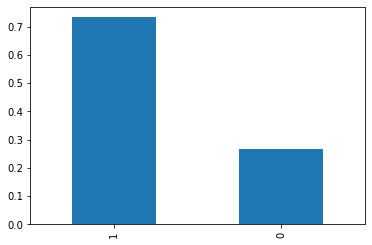

In [27]:
hd.sex.value_counts(normalize=True).plot(kind='bar')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

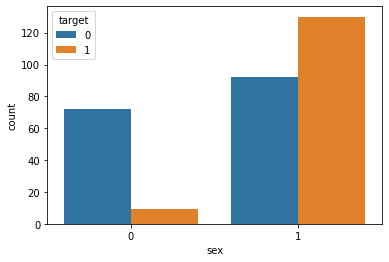

In [32]:
sns.countplot('sex', data=hd,hue='target') 

# Fast Visualization

In [55]:
hd=hd.astype({'sex':'object','cp':'object','fbs':'object','restecg':'object','exang':'object','slope':'object','ca':'object','thal':'object','target':'object'})


# Description of the attributes
1. age - age in years 

2. sex - (1 = male; 0 = female) 

3. cp - chest pain type 

0: Typical angina: chest pain related decrease blood supply to the heart 

1: Atypical angina: chest pain not related to heart 

2: Non-anginal pain: typically esophageal spasms (non heart related) 

3: Asymptomatic: chest pain not showing signs of disease 

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern 

5. chol - serum cholestoral in mg/dl 

serum = LDL + HDL + .2 * triglycerides 

above 200 is cause for concern 

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

'>126' mg/dL signals diabetes 

7. restecg - resting electrocardiographic results 

0: Nothing to note 

1: ST-T Wave abnormality 

can range from mild symptoms to severe problems 

signals non-normal heart beat 

2: Possible or definite left ventricular hypertrophy 

Enlarged heart's main pumping chamber 

8. thalach - maximum heart rate achieved 

9. exang - exercise induced angina (1 = yes; 0 = no) 

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more 

11. slope - the slope of the peak exercise ST segment 

0: Upsloping: better heart rate with excercise (uncommon) 

1: Flatsloping: minimal change (typical healthy heart) 

2: Downslopins: signs of unhealthy heart 

12. ca - number of major vessels (0-3) colored by flourosopy 

colored vessel means the doctor can see the blood passing through 

the more blood movement the better (no clots) 

13. thal - thalium stress result 

1,3: normal 

6: fixed defect: used to be defect but ok now 

7: reversable defect: no proper blood movement when exercising 

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute) 

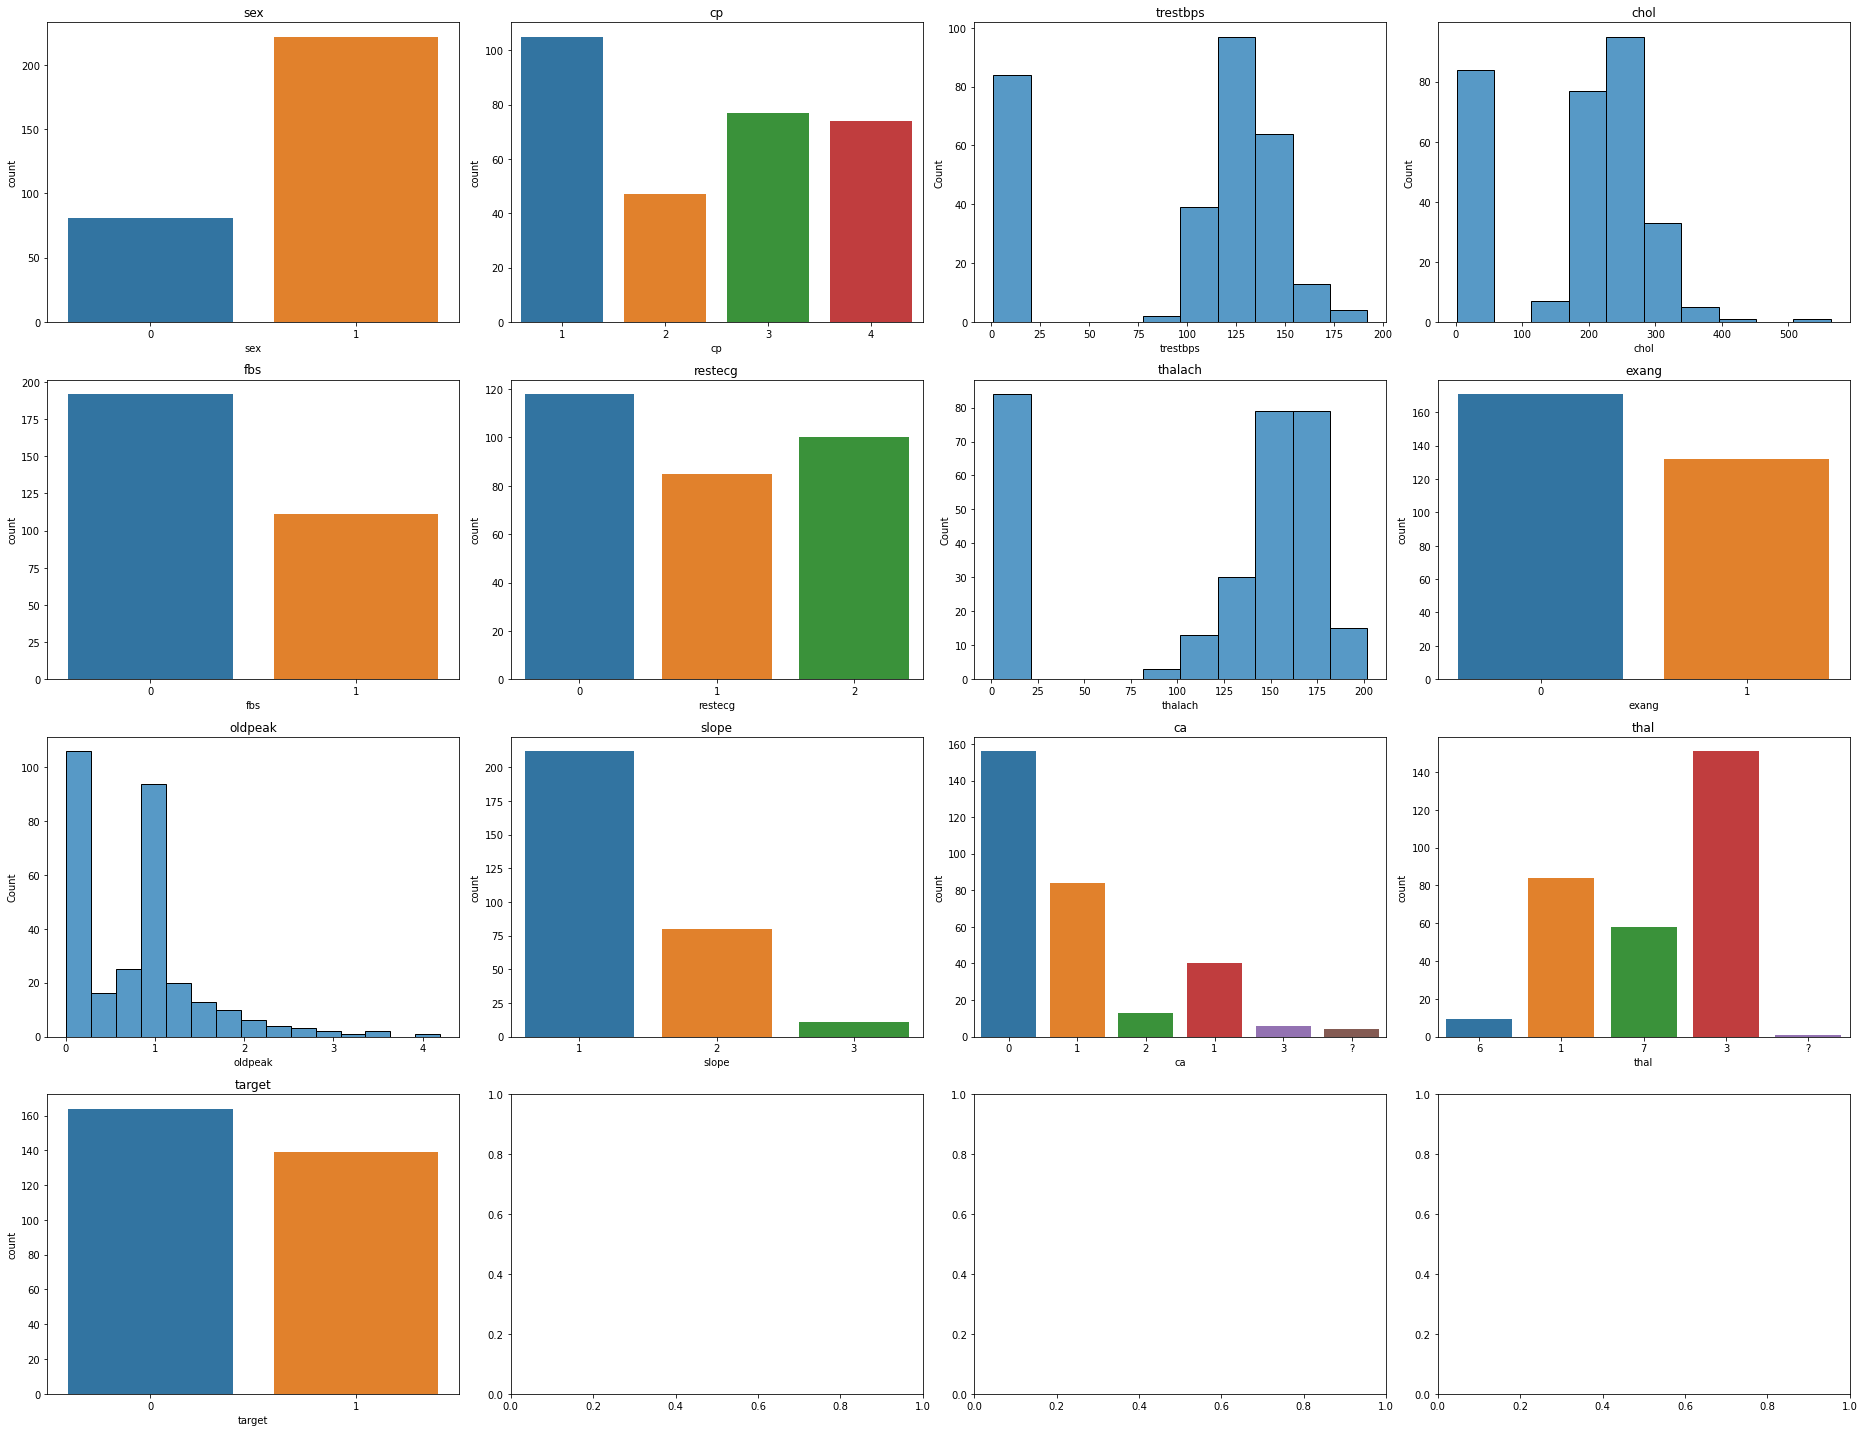

In [56]:

fig, axes = plt.subplots(4,4,figsize=(26,20))
# We will not plot country because it has too many categories.
for i, c in enumerate(hd.columns[1:]):
    ax = axes.reshape(-1)[i]
    if hd[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=hd,ax=ax)
    else:
        b = sns.histplot(x=c,data=hd,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

It looks like some attriubutes have lots of 1's. Let's explore that to see how many.

In [62]:
print((hd['thalach'] == 1).sum())
print((hd['trestbps'] == 1).sum())
print((hd['chol'] == 1).sum())
print((hd['oldpeak'] == 1).sum())

84
84
84
91


TODO: Cycle through all the attributes and compare to target using seaborn

Interesting... the first three attributes all have 84 instances where the value is "1". This may be a "missing" value.
TODO: Read about what those three attributes are, and how the testing was done to gain those values. What does the 1 mean?

Let's see how the attributes are related to target variable

age
AxesSubplot(0.125,0.125;0.775x0.755)
sex


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
cp
AxesSubplot(0.125,0.125;0.775x0.755)
trestbps
AxesSubplot(0.125,0.125;0.775x0.755)
chol


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
fbs
AxesSubplot(0.125,0.125;0.775x0.755)
restecg
AxesSubplot(0.125,0.125;0.775x0.755)
thalach


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
exang
AxesSubplot(0.125,0.125;0.775x0.755)
oldpeak
AxesSubplot(0.125,0.125;0.775x0.755)
slope
AxesSubplot(0.125,0.125;0.775x0.755)
ca


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

AxesSubplot(0.125,0.125;0.775x0.755)
thal
AxesSubplot(0.125,0.125;0.775x0.755)
target
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


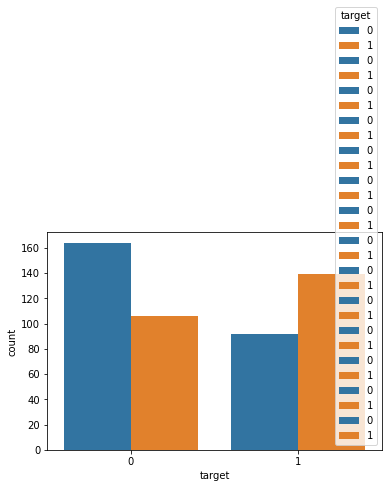

In [70]:
for col in hd.columns:
    print(col)
    print(sns.countplot(col.asString(), data=hd,hue='target'))
    


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='count'>

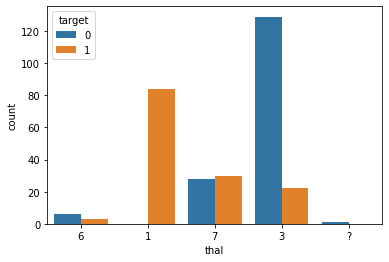

In [73]:
sns.countplot('thal', data=hd,hue='target')